## Problem 8: SVM

Consider the dataset from data_banknote_authentication.csv

0) Read data into a pandas dataframe.

1) Pick the column named "class" as target variable y and all other columns as feature variables X.

2) Split the data into training and testing sets with 80/20 ratio and random_state=20.

3) Use support vector classifier with linear kernel to fit to the training data.

4) Predict on the testing data and compute the confusion matrix and classification report.

5) Repeat steps 3 and 4 for the radial basis function kernel.

6) Compare the two SVM models in your own words.

In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


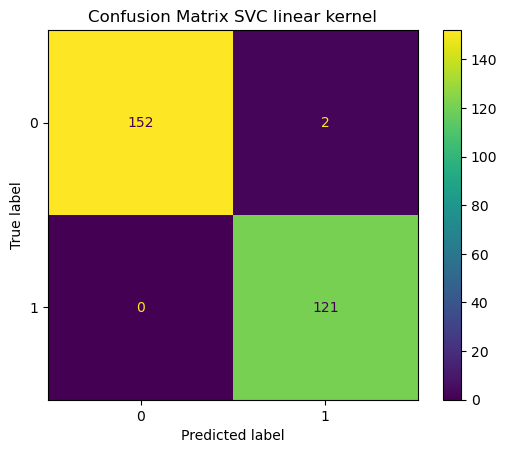

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       154
           1       0.98      1.00      0.99       121

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [2]:
# Step 0
path = os.path.join(os.getcwd(), "data/data_banknote_authentication.csv")
df = pd.read_csv(path)
print(df.head())

# Step 1
X = df.drop("class", axis = 1)
y = df["class"]

# Step 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=20)

# Step 3
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

# Step 4
y_pred = svclassifier.predict(X_test)

ConfusionMatrixDisplay.from_estimator(svclassifier,X_test, y_test)
plt.title("Confusion Matrix SVC linear kernel")
plt.show()
print(classification_report(y_test,y_pred))

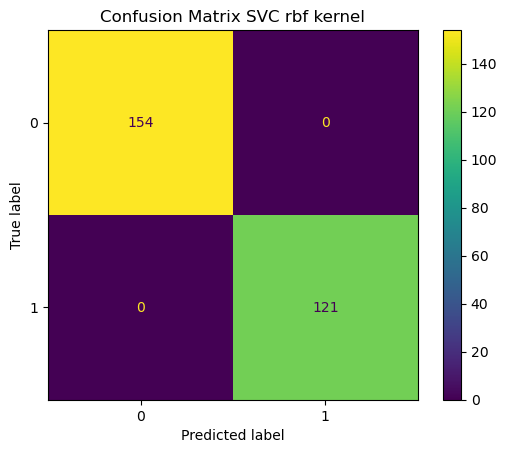

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [3]:
# Step 5
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

ConfusionMatrixDisplay.from_estimator(svclassifier,X_test, y_test)
plt.title("Confusion Matrix SVC rbf kernel")
plt.show()
print(classification_report(y_test,y_pred))


We can see that using SVM with a `linear` kernel leads to an accuracy of 99%. Using `rbf` leads to better performance reaching an accuracy of 100%.

## Problem 9: Feature scaling and KNN

Consider the data from CSV file weight-height.csv.

0) Read data into a pandas dataframe.

1) Pick the target variable y as weight in kilograms, and the feature variable X as height in centimeters.

2) Split the data into training and testing sets with 80/20 ratio.

3) Scale the training and testing data using normalization and standardization.

4) Fit a KNN regression model with k=5 to the training data without scaling, predict on unscaled testing data and compute the R2 value.

5) Repeat step 4 for normalized data.

6) Repeat step 4 for standardize data.

7) Compare the models in terms of their R2 value.

In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [5]:
# Step 0
path = os.path.join(os.getcwd(), "data/weight-height.csv")
df = pd.read_csv(path)

# Step 1
X = df[["Height"]] * 2.54
y = df[["Weight"]] * 0.45359237

# Step 2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=20)

# Step 3
X_train_norm = MinMaxScaler().fit_transform(X_train)
X_test_norm = MinMaxScaler().fit_transform(X_test)
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Step 4
classifier = KNeighborsRegressor(n_neighbors=5)
classifier.fit(X_train, y_train)
print("R2 no scaling: ", classifier.score(X_test, y_test))

# Step 5
classifier = KNeighborsRegressor(n_neighbors=5)
classifier.fit(X_train_norm, y_train)
print("R2 (norm):     ", classifier.score(X_test_norm, y_test))

# Step 6
classifier = KNeighborsRegressor(n_neighbors=5)
classifier.fit(X_train_std, y_train)
print("R2 (std):      ", classifier.score(X_test_std, y_test))

R2 no scaling:  0.8327437044707436
R2 (norm):      0.8278178089184237
R2 (std):       0.834295815520114


We can see that using normalization leads to a very small decrease in performance in term of R2 whereas using standardization leads to a very small increase but it remains very similar.

## Problem 10: Decision tree

Consider data from file suv.csv

0) Read the data into a pandas dataframe.

1) Pick Age and Estimated Salary as the features and Purchased as the target variable.

2) Split the data into training and testing sets with 80/20 ratio.

3) Scale the features using standard scaler.

4) Train a decision tree classifier with entropy criterion and predict on test set.

5) Print the confusion matrix and the classification report.

6) Repeat steps 4 and 5 with the gini criterion.

7) Discuss the performance of your models.

In [6]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
# Part 0
path = os.path.join(os.getcwd(), "data/suv.csv")
df = pd.read_csv(path)

# Part 1
X = df[["Age", "EstimatedSalary"]]
y = df[["Purchased"]]

# Part 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

# Part 3
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)

# Part 4
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Part 5
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train_std, y_train)
y_pred = classifier.predict(X_test_std)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  1]
 [10 25]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        45
           1       0.96      0.71      0.82        35

    accuracy                           0.86        80
   macro avg       0.89      0.85      0.85        80
weighted avg       0.88      0.86      0.86        80

[[44  1]
 [10 25]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        45
           1       0.96      0.71      0.82        35

    accuracy                           0.86        80
   macro avg       0.89      0.85      0.85        80
weighted avg       0.88      0.86      0.86        80



We can see that there is no improvement using `gini` criterion as compared to `entropy` criterion. (Note that random_state is fixed to 20 in splitting data into training and testing dataset. If random_state was not fixed, it would leads to situations where there are improvement and other without improvement but on a really small margin)